In [3]:
import fastf1 as ff1
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import numpy as np
import random
import re

In [4]:
ff1.Cache.enable_cache('../cache')

In [5]:
year, event, event_type = 2023, 'Australia', 'Q'
session = ff1.get_session(year, event, event_type)
session.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\Ricky\AppData\Local\Programs

In [6]:
driver_1 = 'VER'
laps_driver_1 = session.laps.pick_driver(driver_1)
# idk_mate = laps_driver_1.loc[laps_driver_1['LapNumber'] == 50]
idk_mate = laps_driver_1.pick_fastest()
telemetry = idk_mate.get_telemetry().add_distance()
team_driver_1 = laps_driver_1['Team']

C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] 

In [7]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = telemetry['nGear'].to_numpy().astype(float)

In [8]:
plot_size = [15, 15]
title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}"
plot_filename = title.replace(" ", "").replace("\n", "") + ".png"

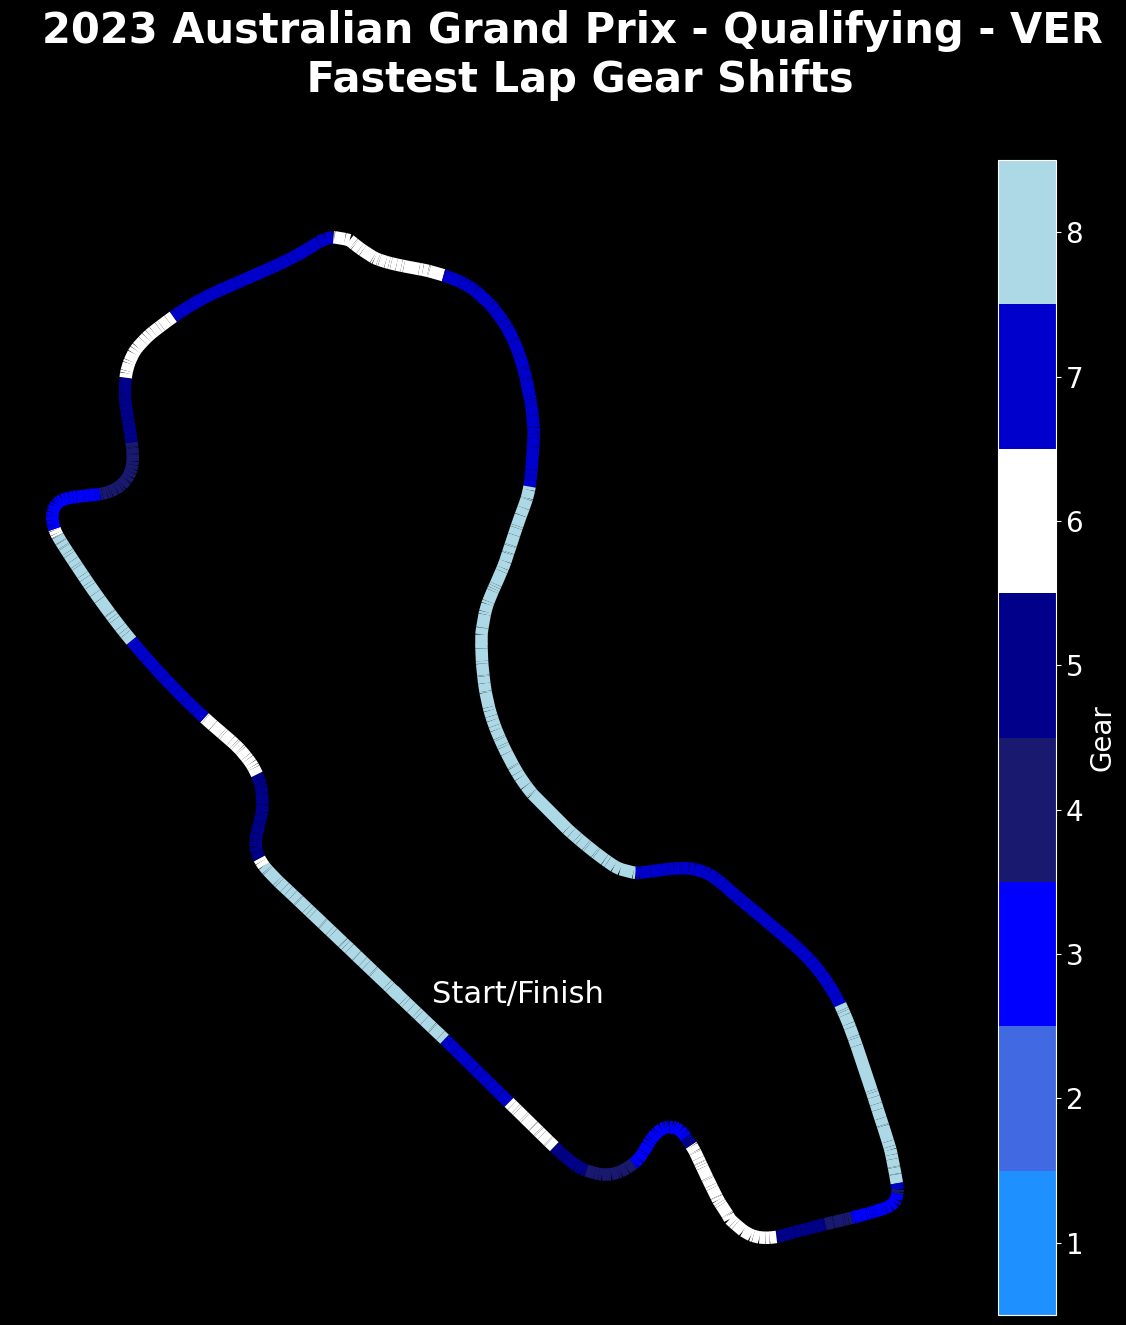

In [11]:
# Define a custom colormap with a harsh gradient
colors = ['white', 'lightblue', 'dodgerblue', 'royalblue', 'blue', 'darkblue', 'mediumblue',  'midnightblue']
new_colors = colors.copy()
random.shuffle(new_colors)
custom_cmap = ListedColormap(new_colors)

lc_comp = LineCollection(segments, norm=plt.Normalize(1, custom_cmap.N+1), cmap=custom_cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(9)

# Find the y-coordinate of the starting point
start_y = segments[0][0][1]

# Calculate the width of the track
track_width = 9  # This is the value you used for lc_comp.set_linewidth()

# Set the start/finish line width to half of the track width
line_width = track_width / 2

# Draw the start/finish line
xmin = segments[0][0][0]
xmax = xmin + line_width
plt.hlines(y=start_y, xmin=xmin, xmax=xmax, color='red', linestyle='--', linewidth=2)

# Add the "Start/Finish" text
text_x = xmax + 600  # You can adjust the 0.5 value to change the distance between the text and the line
text_y = start_y
plt.text(text_x, text_y, 'Start/Finish', fontsize=22, verticalalignment='center')

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.suptitle(f"{title}\n Fastest Lap Gear Shifts", size = 30, fontweight='bold')

cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))
# Set the tick label size to 20
cbar.ax.tick_params(labelsize=20)
cbar.set_label("Gear", fontsize=20)  # Set the label size

plt.rcParams['figure.figsize'] = plot_size
plt.style.use('dark_background')
plt.gca().set_axis_off()
plt.savefig(plot_filename, dpi=300)
plt.show()